# Installing and importing libraries

In [1]:
!pip install statsbombpy
!pip install nose2
!nose2 -v --pretty-assert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.6/205.6 kB 9.7 MB/s eta 0:00:00

----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


All libraries are imported here

In [85]:
import pandas as pd
import numpy as np
from statsbombpy import sb
import warnings
import matplotlib.pyplot as plt



# Data Engineering

## Creating out the data and exploring it

In [3]:
dir(sb)

['DEFAULT_CREDS',
 'MAX_CONCURRENCY',
 'Pool',
 'Union',
 '_360_frames',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'api_client',
 'competition_events',
 'competition_frames',
 'competitions',
 'events',
 'filter_and_group_events',
 'frames',
 'lineups',
 'matches',
 'merge_events_and_frames',
 'partial',
 'pd',
 'player_match_stats',
 'player_season_stats',
 'public',
 'reduce_events',
 'team_season_stats']

## Getting competition that we need

In [4]:
df = sb.competitions() # Show all competitions

FWC = df[df['competition_name'] == 'FIFA World Cup']
FWC # See all the tournaments for the Fifa World Cup

/usr/local/lib/python3.10/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
18,43,106,International,FIFA World Cup,male,False,True,2022,2023-06-24T17:17:27.911026,2023-06-24T17:18:55.629111,2023-06-24T17:18:55.629111,2023-06-24T17:17:27.911026
19,43,3,International,FIFA World Cup,male,False,True,2018,2022-09-05T17:17:56.670896,2021-06-13T16:17:31.694,None,2022-09-05T17:17:56.670896


In [5]:
df.loc[:, "competition_name"]

0            Champions League
1            Champions League
2            Champions League
3            Champions League
4            Champions League
5            Champions League
6            Champions League
7            Champions League
8            Champions League
9            Champions League
10           Champions League
11           Champions League
12           Champions League
13           Champions League
14           Champions League
15    FA Women's Super League
16    FA Women's Super League
17    FA Women's Super League
18             FIFA World Cup
19             FIFA World Cup
20        Indian Super league
21                    La Liga
22                    La Liga
23                    La Liga
24                    La Liga
25                    La Liga
26                    La Liga
27                    La Liga
28                    La Liga
29                    La Liga
30                    La Liga
31                    La Liga
32                    La Liga
33        

In [6]:
df.columns

Index(['competition_id', 'season_id', 'country_name', 'competition_name',
       'competition_gender', 'competition_youth', 'competition_international',
       'season_name', 'match_updated', 'match_updated_360',
       'match_available_360', 'match_available'],
      dtype='object')

## All the matches that happened in the World Cup 2022

In [7]:
WC22 = sb.matches(competition_id= 43, season_id = 106).head(3) # They are 64 rows in total because there were 64 games.
WC22

/usr/local/lib/python3.10/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-05-14T23:35:15.370647,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2


In [8]:
ARG_AUS_events = sb.events(match_id=3869151) # ARG VS AUS
ARG_AUS_events.head(3)

/usr/local/lib/python3.10/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",Australia,792,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Australia,792,00:00:00.000,Half Start,NaN


In [9]:
sb.events(match_id=3869151, split=True, flatten_attrs=False)["dribbles"].head(3)

/usr/local/lib/python3.10/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,position,location,duration,under_pressure,related_events,dribble,match_id,possession_team_id,team_id,player_id
0,99b8ff1b-6a2e-4760-80e0-23ea3faad7b4,542,1,00:10:39.234,10,39,Dribble,19,Argentina,From Throw In,...,Left Wing,"[37.4, 19.6]",0.0,True,"[538e28ba-619c-4dc2-9000-813213a7d2b2, 9002f77...","{'outcome': {'id': 9, 'name': 'Incomplete'}}",3869151,779,779,7006
1,535ff683-fb17-453c-a244-47bb68ed945a,899,1,00:18:00.854,18,0,Dribble,27,Argentina,Regular Play,...,Right Back,"[33.3, 75.3]",0.0,True,[3bbe48cd-14c3-4d28-a52b-70d9a3495e6f],"{'outcome': {'id': 9, 'name': 'Incomplete'}}",3869151,779,779,29201
2,abba290b-f012-4617-83a5-629d6884a7bf,1446,1,00:29:08.965,29,8,Dribble,45,Australia,Regular Play,...,Right Back,"[19.4, 72.3]",0.0,True,[a704f209-00a7-42f4-a4c2-ca05c38d5c69],"{'outcome': {'id': 8, 'name': 'Complete'}}",3869151,792,792,15957


In [10]:
sb.lineups(match_id=3869151)["Argentina"].head(3)

/usr/local/lib/python3.10/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,2995,Ángel Fabián Di María Hernández,Ángel Di María,11,Argentina,[],[]
1,3090,Nicolás Hernán Otamendi,Nicolás Otamendi,19,Argentina,[],"[{'position_id': 5, 'position': 'Left Center B..."
2,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,Argentina,[],"[{'position_id': 23, 'position': 'Center Forwa..."


In [11]:
arg_vs_aus = sb.events(match_id=3869151, split=True, flatten_attrs=False)['passes']
arg_vs_aus.head(3)
arg_vs_aus['location'].max() # Here we can know that they are using the pitch dimensions in yards.

/usr/local/lib/python3.10/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


[120.0, 80.0]

In [12]:
arg_vs_aus.keys()

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'pass',
       'match_id', 'possession_team_id', 'team_id', 'player_id',
       'under_pressure', 'off_camera', 'counterpress', 'out'],
      dtype='object')

In [13]:
sb.events(match_id=3857254, split=True, flatten_attrs=False)["dribbles"].head(3) # get all the events dribbles for  Argentia vs Australia

/usr/local/lib/python3.10/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,position,location,duration,under_pressure,related_events,dribble,match_id,possession_team_id,team_id,player_id
0,4fbb9158-3623-429f-8e9d-8ef3b95921ee,192,1,00:04:15.413,4,15,Dribble,13,Tunisia,Regular Play,...,Right Center Back,"[97.4, 63.1]",0.0,True,[10cb6ed6-e822-46fa-8a14-96d665cf1692],"{'outcome': {'id': 9, 'name': 'Incomplete'}, '...",3857254,777,777,5655
1,0d98a659-01a2-4b7c-9283-2da40e473713,631,1,00:15:24.934,15,24,Dribble,33,Denmark,Regular Play,...,Left Center Midfield,"[74.2, 6.2]",0.0,True,[b06d46af-7af5-4678-8bfb-a061c8a51139],"{'outcome': {'id': 9, 'name': 'Incomplete'}}",3857254,776,776,3043
2,77da4c97-2689-4728-8d8e-e76ebce2c0d5,636,1,00:15:28.127,15,28,Dribble,33,Denmark,Regular Play,...,Left Center Midfield,"[81.4, 3.7]",0.0,True,[d7dc79ac-1fe8-4d05-93fd-f082d0e81b79],"{'outcome': {'id': 9, 'name': 'Incomplete'}}",3857254,776,776,3043


## Combining all the events that happened in the WC

In [14]:
# Combining all the events of the Fifa World Cup 2022
events = sb.competition_events(
    country="International",
    division= "FIFA World Cup",
    season="2022",
    gender="male"
)

WC_events22 = sb.competition_events(
    country="International",
    division= "FIFA World Cup",
    season="2022",
    split=True
)
# WC_events22['dribbles'] # Get all the dribbles that happened in the world cup

# grouped_events.drop('id', axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [15]:
# Get the list of column names or keys
key_names = WC_events22.keys()

# Print the column names
for key in key_names:
    print(key)

starting_xis
half_starts
passes
ball_receipts
carrys
clearances
ball_recoverys
shots
blocks
goal_keepers
miscontrols
pressures
duels
interceptions
foul_committeds
foul_wons
dispossesseds
dribbles
dribbled_pasts
errors
injury_stoppages
half_ends
substitutions
bad_behaviours
referee_ball_drops
tactical_shifts
player_offs
player_ons
shields
own_goal_fors
own_goal_againsts
50/50s
offsides


get expected goals

In [16]:
WC_events22['shots'].columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'shot_statsbomb_xg', 'shot_end_location', 'shot_technique',
       'shot_body_part', 'shot_type', 'shot_outcome', 'shot_first_time',
       'shot_freeze_frame', 'possession_team_id', 'team_id', 'player_id',
       'shot_key_pass_id', 'shot_one_on_one', 'shot_deflected',
       'under_pressure', 'shot_open_goal', 'shot_aerial_won', 'out',
       'shot_follows_dribble', 'shot_saved_to_post', 'shot_saved_off_target',
       'shot_redirect'],
      dtype='object')

In [17]:
type(WC_events22)

collections.defaultdict

## Get all the shot events in the tournament between player to xG

In [18]:
xg_df = WC_events22['shots']
xG = xg_df.loc[:, 'player':'shot_statsbomb_xg']
xG

,player,position,location,duration,related_events,match_id,shot_statsbomb_xg
0,Granit Xhaka,Left Defensive Midfield,"[96.0, 38.8]",0.380264,"[23ce15e2-05d8-4adf-87de-90b82585c085, b27d5a6...",3857256,0.036566
1,Breel-Donald Embolo,Center Forward,"[113.1, 40.7]",0.175803,[ca8f5082-211d-4c5e-9827-b61cf7fa7ca2],3857256,0.353289
2,Granit Xhaka,Left Defensive Midfield,"[103.8, 41.9]",0.495575,[03e8c43d-a1ee-4477-a6cd-3761b9379837],3857256,0.069527
3,Nikola Milenković,Right Center Back,"[112.2, 36.8]",0.848375,[42dca3d5-9c35-4da4-8d13-0ae643b4d9c7],3857256,0.081609
4,Andrija Živković,Right Wing Back,"[97.8, 51.5]",0.934407,[66f1d9e3-640c-493d-80e6-33a247444389],3857256,0.030002
...,...,...,...,...,...,...,...
1489,Andreas Evald Cornelius,Center Forward,"[118.2, 43.9]",0.058813,[b2cf8522-fd3d-44ae-b3d2-6a2c2d40ce7a],3857254,0.568312
1490,Mathias Jensen,Left Defensive Midfield,"[102.5, 24.2]",0.995427,[100b467e-ced3-4e97-ab89-3656d3ab04c5],3857254,0.028724
1491,Andreas Evald Cornelius,Center Forward,"[114.4, 36.8]",1.239140,"[a4edfab9-529b-4f34-b150-bf665f559ce5, f1dcd43...",3857254,0.145394
1492,Joakim Mæhle,Left Back,"[95.0, 30.2]",0.164703,"[2da1a8a2-7c43-4ffa-91da-a4ed3d276e8c, 8c6aa51...",3857254,0.028684


Creating our class xT to predict on

In [19]:
# class xT:
#   def __int__(self, x):
#     self.x = x

#   def get_x(self):
#     return self.x

#   def set_x(self, new_x):
#     self.x = new_x

In [20]:
Final_df = pd.DataFrame()
type(Final_df)

pandas.core.frame.DataFrame

## Combining the relevent data into one dataframe

In [21]:
# Merge the DataFrames based on 'match_id', 'index', and 'location' columns
# Now, create a new DataFrame by taking the 'column_name' column from df1
WC_events22_passes = WC_events22['passes'][['match_id','index', 'team', 'player' ,'timestamp','minute', 'second', 'period' , 'location', 'type', 'pass_end_location' ]].copy()
WC_events22_carrys = WC_events22['carrys'][['match_id','index', 'team', 'player' ,'timestamp','minute', 'second', 'period' , 'location', 'type',  'carry_end_location']].copy()
WC_events22_dribbles = WC_events22['dribbles'][['match_id','index', 'team', 'player' ,'timestamp','minute', 'second', 'period' , 'location', 'type'  ]].copy()
WC_events22_shot = WC_events22['shots'][['match_id','index', 'team', 'player' ,'timestamp','minute', 'second', 'period' , 'location','shot_outcome', 'shot_end_location' ,'shot_statsbomb_xg' , 'type' ]].copy()
# Merge the DataFrames based on 'index' and 'location' columns
# Combine the DataFrames by stacking them vertically (top on top)
final_df = pd.concat([WC_events22_passes, WC_events22_carrys, WC_events22_dribbles, WC_events22_shot

                      ], axis=0)
# The most important events that we have is shoot, pass, dribble, carry.

# Sort the final DataFrame by 'index' column
final_df.sort_values(by=['match_id','index'], inplace=True)

# Reset the index of the DataFrame
final_df.reset_index(drop=True, inplace=True)

final_df


,match_id,index,team,player,timestamp,minute,second,period,location,type,pass_end_location,carry_end_location,shot_outcome,shot_end_location,shot_statsbomb_xg
0,3857254,5,Denmark,Kasper Dolberg,00:00:00.361,0,0,1,"[60.0, 40.0]",Pass,"[58.0, 36.6]",NaN,NaN,NaN,NaN
1,3857254,7,Denmark,Christian Dannemann Eriksen,00:00:00.580,0,0,1,"[58.0, 36.6]",Carry,NaN,"[59.3, 40.7]",NaN,NaN,NaN
2,3857254,8,Denmark,Christian Dannemann Eriksen,00:00:01.560,0,1,1,"[59.3, 40.7]",Pass,"[74.8, 52.3]",NaN,NaN,NaN,NaN
3,3857254,10,Denmark,Andreas Skov Olsen,00:00:02.816,0,2,1,"[74.8, 52.3]",Carry,NaN,"[77.4, 54.9]",NaN,NaN,NaN
4,3857254,12,Denmark,Andreas Skov Olsen,00:00:03.793,0,3,1,"[77.4, 54.9]",Pass,"[86.5, 74.9]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125560,3869685,4395,Argentina,Paulo Bruno Exequiel Dybala,00:02:27.184,122,27,5,"[108.1, 40.1]",Shot,NaN,NaN,Goal,"[120.0, 40.4, 0.2]",0.7835
125561,3869685,4397,France,Aurélien Djani Tchouaméni,00:03:29.289,123,29,5,"[108.1, 40.1]",Shot,NaN,NaN,Off T,"[120.0, 35.6, 0.2]",0.7835
125562,3869685,4399,Argentina,Leandro Daniel Paredes,00:04:16.722,124,16,5,"[108.1, 40.1]",Shot,NaN,NaN,Goal,"[120.0, 37.6, 0.2]",0.7835
125563,3869685,4402,France,Randal Kolo Muani,00:05:09.782,125,9,5,"[108.1, 40.1]",Shot,NaN,NaN,Goal,"[120.0, 39.3, 1.6]",0.7835


In [22]:
# WC_events22_ball_receipts = WC_events22['ball_receipts'][['match_id','index', 'location' ]].copy()
# WC_events22_clearances = WC_events22['clearances'][['match_id','index', 'location' ]].copy()
# WC_events22_ball_recoverys = WC_events22['ball_recoverys'][['match_id','index', 'location' ]].copy()
# WC_events22_blocks = WC_events22['blocks'][['match_id','index', 'location' ]].copy()
# WC_events22_goal_keepers = WC_events22['goal_keepers'][['match_id','index', 'location' ]].copy()
# WC_events22_miscontrols = WC_events22['miscontrols'][['match_id','index', 'location' ]].copy()
# WC_events22_pressures = WC_events22['pressures'][['match_id','index', 'location' ]].copy()
# WC_events22_duels = WC_events22['duels'][['match_id','index', 'location' ]].copy()
# WC_events22_interceptions =  WC_events22['interceptions'][['match_id','index', 'location' ]].copy()
# WC_events22_foul_committeds = WC_events22['foul_committeds'][['match_id','index', 'location' ]].copy()
# WC_events22_foul_wons = WC_events22['foul_wons'][['match_id','index', 'location' ]].copy()
# WC_events22_dispossesseds = WC_events22['dispossesseds'][['match_id','index', 'location' ]].copy()
# WC_events22_dribbled_pasts = WC_events22['dribbled_pasts'][['match_id','index', 'location' ]].copy()
# WC_events22_errors =  WC_events22['errors'][['match_id','index', 'location' ]].copy()
# WC_events22_referee_ball_drops = WC_events22['referee_ball_drops'][['match_id','index', 'location' ]].copy()
# WC_events22_shields = WC_events22['shields'][['match_id','index', 'location' ]].copy()
# WC_events22_own_goal_fors = WC_events22['own_goal_fors'][['match_id','index', 'location' ]].copy()
# WC_events22_own_goal_againsts = WC_events22['own_goal_againsts'][['match_id','index', 'location' ]].copy()
# WC_events22_50_50s = WC_events22['50/50s'][['match_id','index', 'location' ]].copy()
# WC_events22_offsides = WC_events22['offsides'][['match_id','index', 'location' ]].copy()



 # WC_events22_ball_receipts, WC_events22_clearances, WC_events22_ball_recoverys,
                      # WC_events22_blocks, WC_events22_goal_keepers, WC_events22_miscontrols, WC_events22_pressures,
                      # WC_events22_duels, WC_events22_interceptions, WC_events22_foul_committeds, WC_events22_foul_wons,
                      # WC_events22_dispossesseds, WC_events22_dribbled_pasts, WC_events22_referee_ball_drops,
                      # WC_events22_shields, WC_events22_own_goal_fors, WC_events22_own_goal_againsts, WC_events22_50_50s,
                      # WC_events22_offsides

## Combining the end locations together to make end_location

In [23]:
final_df['end_location'] = final_df['pass_end_location']
final_df['end_location'] = final_df['end_location'].combine_first(final_df['carry_end_location'])
final_df['end_location'] = final_df['end_location'].combine_first(final_df['shot_end_location'])
final_df

,match_id,index,team,player,timestamp,minute,second,period,location,type,pass_end_location,carry_end_location,shot_outcome,shot_end_location,shot_statsbomb_xg,end_location
0,3857254,5,Denmark,Kasper Dolberg,00:00:00.361,0,0,1,"[60.0, 40.0]",Pass,"[58.0, 36.6]",NaN,NaN,NaN,NaN,"[58.0, 36.6]"
1,3857254,7,Denmark,Christian Dannemann Eriksen,00:00:00.580,0,0,1,"[58.0, 36.6]",Carry,NaN,"[59.3, 40.7]",NaN,NaN,NaN,"[59.3, 40.7]"
2,3857254,8,Denmark,Christian Dannemann Eriksen,00:00:01.560,0,1,1,"[59.3, 40.7]",Pass,"[74.8, 52.3]",NaN,NaN,NaN,NaN,"[74.8, 52.3]"
3,3857254,10,Denmark,Andreas Skov Olsen,00:00:02.816,0,2,1,"[74.8, 52.3]",Carry,NaN,"[77.4, 54.9]",NaN,NaN,NaN,"[77.4, 54.9]"
4,3857254,12,Denmark,Andreas Skov Olsen,00:00:03.793,0,3,1,"[77.4, 54.9]",Pass,"[86.5, 74.9]",NaN,NaN,NaN,NaN,"[86.5, 74.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125560,3869685,4395,Argentina,Paulo Bruno Exequiel Dybala,00:02:27.184,122,27,5,"[108.1, 40.1]",Shot,NaN,NaN,Goal,"[120.0, 40.4, 0.2]",0.7835,"[120.0, 40.4, 0.2]"
125561,3869685,4397,France,Aurélien Djani Tchouaméni,00:03:29.289,123,29,5,"[108.1, 40.1]",Shot,NaN,NaN,Off T,"[120.0, 35.6, 0.2]",0.7835,"[120.0, 35.6, 0.2]"
125562,3869685,4399,Argentina,Leandro Daniel Paredes,00:04:16.722,124,16,5,"[108.1, 40.1]",Shot,NaN,NaN,Goal,"[120.0, 37.6, 0.2]",0.7835,"[120.0, 37.6, 0.2]"
125563,3869685,4402,France,Randal Kolo Muani,00:05:09.782,125,9,5,"[108.1, 40.1]",Shot,NaN,NaN,Goal,"[120.0, 39.3, 1.6]",0.7835,"[120.0, 39.3, 1.6]"


## Apply the formula to find xT

### We need to do binning first to make the grid into equal dimensions

The formula is: xTxy = (Sxy * Gxy) + (Mxy 16∑ 12∑T(x,y)→(z,w)xTz,w )


In [24]:
# Assuming you have a DataFrame named 'final_df' with the 'location' column

def create_grid_cells(location, num_rows, num_columns, x_max, y_max):
    """
    Assign a grid cell to each location based on its (x, y) coordinates.

    Parameters:
        location (tuple): (x, y) coordinates of the location.
        num_rows (int): Number of rows in the grid.
        num_columns (int): Number of columns in the grid.
        x_max (float): Maximum x-coordinate value on the field.
        y_max (float): Maximum y-coordinate value on the field.

    Returns:
        tuple: (row, column) indices of the grid cell for the given location.
    """
    x, y = location
    row = int(num_rows * y / y_max)
    column = int(num_columns * x / x_max)
    return row, column

# Define the dimensions of the grid (12x16)
num_rows, num_columns = 12, 16

# Determine the maximum x and y coordinates from the 'location' column
x_max = final_df['location'].apply(lambda loc: loc[0]).max()
y_max = final_df['location'].apply(lambda loc: loc[1]).max()

# Create new columns 'row' and 'column' to store the grid cell indices
final_df[['row', 'column']] = final_df['location'].apply(lambda loc: create_grid_cells(loc, num_rows, num_columns, x_max, y_max)).tolist()

# Now the 'final_df' DataFrame contains the 'row' and 'column' columns with the grid cell indices for each location.
print("There is {} rows and {} columns ".format(final_df['row'].max(), final_df['column'].max()))

There is 12 rows and 16 columns 


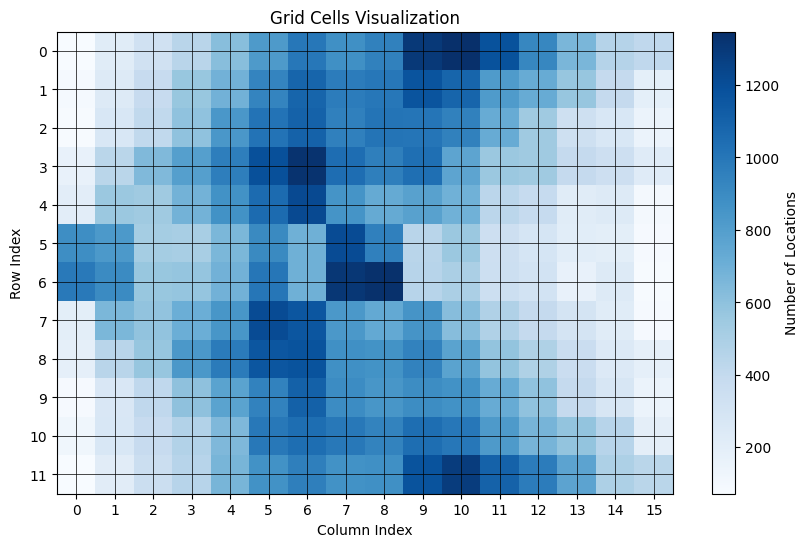

In [90]:
def create_grid_cells(location, num_rows, num_columns, x_max, y_max):
    x, y = location
    row = min(int(num_rows * y / y_max), num_rows - 1)
    column = min(int(num_columns * x / x_max), num_columns - 1)
    return row, column

# Define the dimensions of the grid (12x16)
num_rows, num_columns = 12, 16

# df_shots_only = final_df[final_df['type'] == 'Shot'] # to find all the shot events uncomment this
# and change all the final_df to df_shots_only

# Determine the maximum x and y coordinates from the 'location' column
x_max = final_df['location'].apply(lambda loc: loc[0]).max()
y_max = final_df['location'].apply(lambda loc: loc[1]).max()

# Create new columns 'row' and 'column' to store the grid cell indices
final_df[['row', 'column']] = final_df['location'].apply(lambda loc: create_grid_cells(loc, num_rows, num_columns, x_max, y_max)).tolist()

# Create the grid and count the number of locations in each cell
grid = [[0 for _ in range(num_columns)] for _ in range(num_rows)]
for _, row in final_df.iterrows():
    grid[row['row']][row['column']] += 1

# Plot the grid
plt.figure(figsize=(10, 6))
plt.imshow(grid, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Number of Locations')
plt.title('Grid Cells Visualization')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.xticks(range(num_columns))
plt.yticks(range(num_rows))
plt.grid(True, which='both', color='black', linewidth=0.5)
plt.show()


### We calculate the expected shot, move, transition from x,y to z,w , and xTzw

In [31]:
final_df.columns

Index(['match_id', 'index', 'team', 'player', 'timestamp', 'minute', 'second',
       'period', 'location', 'type', 'pass_end_location', 'carry_end_location',
       'shot_outcome', 'shot_end_location', 'shot_statsbomb_xg',
       'end_location', 'row', 'column'],
      dtype='object')

### Shooting probability (xSxy)

In [105]:

def shot_probability(row, column, df):
    """
    Calculate the shot probability for a specific 'row' and 'column' in the DataFrame.

    Parameters:
        row (int): The row index representing the grid cell.
        column (int): The column index representing the grid cell.
        df (pandas.core.frame.DataFrame): The DataFrame containing all the events.

    Returns:
        float: The shot probability for the specified 'row' and 'column'.
    """
    # Filter the DataFrame to include only Shot events in the specific 'row' and 'column'
    shot_events = df[(df['type'] == 'Shot') & (df['row'] == row) & (df['column'] == column)]

    # Count the total number of events in the DataFrame
    total_events = len(df)

    if total_events == 0:
        return 0.0

    # Calculate the shot probability for the specific 'row' and 'column'
    shot_probability = len(shot_events) / total_events

    return shot_probability

# Example usage:
# Assuming you have the desired 'row' and 'column' indices
desired_row = 6
desired_column = 14

# Call the shot_probability function with the desired 'row', 'column', and 'final_df' DataFrame
probability = shot_probability(desired_row, desired_column, final_df)

print("Move Probability for Row {} and Columns {} : {}".format(desired_row, desired_column, probability))


Move Probability for Row 6 and Columns 14 : 0.001497232509059053


In [106]:

def shot_probability(row, column, df):
    """
    Calculate the shot probability for a specific 'row' and 'column' in the DataFrame.

    Parameters:
        row (int): The row index representing the grid cell.
        column (int): The column index representing the grid cell.
        df (pandas.core.frame.DataFrame): The DataFrame containing all the events.

    Returns:
        float: The shot probability for the specified 'row' and 'column'.
    """
    # Filter the DataFrame to include only Shot events in the specific 'row' and 'column'
    shot_events = df[(df['type'] == 'Shot') & (df['row'] == row) & (df['column'] == column)]

    # Count the total number of events in the DataFrame
    total_events = len(df[(df['type'] == 'Shot')])

    if total_events == 0:
        return 0.0

    # Calculate the shot probability for the specific 'row' and 'column'
    shot_probability = len(shot_events) / total_events

    return shot_probability

# Example usage:
# Assuming you have the desired 'row' and 'column' indices
desired_row = 6
desired_column = 14

# Call the shot_probability function with the desired 'row', 'column', and 'final_df' DataFrame
probability = shot_probability(desired_row, desired_column, final_df)

print("Move Probability for Row {} and Columns {} : {}".format(desired_row, desired_column, probability))


Move Probability for Row 6 and Columns 14 : 0.12583668005354753


In [ ]:
# Add xS to final_df using the function we created above

final_df['shooting_probability'] = final_df.apply(lambda row: shot_probability(row['row'],
                                                                               row['column'], final_df), axis=1)

In [103]:
def find_average_location(locations):
    total_sum = [0, 0]
    num_locations = len(locations)

    for location in locations:
        total_sum[0] += location[0]
        total_sum[1] += location[1]

    average_location = [total_sum[0] / num_locations, total_sum[1] / num_locations]
    return average_location


average_location = find_average_location(WC_events22['shots']['location'])
print("Average shot location Location: {}".format(average_location))


Average shot location Location: [104.5564257028113, 39.85649263721548]


### Moving Probability (xMxy)

In [102]:
def move_probability(row, column, df):
    """
    Calculate the move probability for a specific 'row' and 'column' in the DataFrame.

    Parameters:
        row (int): The row index representing the grid cell.
        column (int): The column index representing the grid cell.
        df (pandas.core.frame.DataFrame): The DataFrame containing all the events.

    Returns:
        float: The move probability for the specified 'row' and 'column'.
    """
    # Calculate the shot probability for the specific 'row' and 'column'
    shot_prob = shot_probability(row, column, df)

    # Calculate the move probability as 1 minus the shot probability
    move_prob = 1 - shot_prob

    return move_prob

# Example usage:
# Assuming you have the desired 'row' and 'column' indices
desired_row = 4
desired_column = 13

# Call the move_probability function with the desired 'row', 'column', and 'final_df' DataFrame
probability = move_probability(desired_row, desired_column, final_df)

print("Move Probability for Row {} and Columns {} : {}".format(desired_row, desired_column, probability))

Move Probability for Row 4 and Columns 13 : 0.9618473895582329


In [ ]:
# Adding the xM to every event that happened across the tournamnet
final_df['moving_probability'] = final_df.apply(lambda row: move_probability(row['row'],
                                                                             row['column'], final_df), axis=1)

### Transmition matrix form x,y to z,w

# Exploratory Data Analysis

# Data pre-processing

# Model Implementation

# Result Analysis